### 윌콕슨 순위-합 검정  (Wilcoxon Rank-Sum Test, Mann-Whitney U-test) 

- 목적: 두 독립 집단 간 위치 차이(중앙값 차이)를 검정
- 가정 : 1) 두 집단은 서로 독립적이다. 2) 측정값은 최소한 서열척도(순위화 가능) 여야 한다.

- Wilcoxon Signed-Rank Test는 비모수 통계 검정(non-parametric test) 방법
- 두 개의 독립 표본 집단의 차이를 비교할 때 혹은 한 집단의 전/후 비교에서 사용.
- 대응표본 t-검정(paired t-test)의 정규성 가정이 만족되지 않을 때 대체 방법으로 사용
- 데이터가 정규분포를 따르지 않아도 사용 가능하다.

In [2]:
import numpy as np
from scipy.stats import mannwhitneyu

# 예제 데이터
group_A = np.array([8, 12, 15])
group_B = np.array([9, 10, 14, 18])

# 윌콕슨 순위합 검정 수행
stat, p_value = mannwhitneyu(group_A, group_B, alternative='two-sided') #"two-sided" : 두 집단이 다르다고 가정

print("Mann-Whitney U 통계량:", stat)
print("p-value:", p_value)

# 해석
alpha = 0.05
if p_value < alpha:
    print("→ 귀무가설 기각: 두 집단의 중앙값은 통계적으로 유의하게 다릅니다.")
else:
    print("→ 귀무가설 채택: 두 집단의 중앙값에 유의한 차이가 없습니다.")


Mann-Whitney U 통계량: 5.0
p-value: 0.8571428571428571
→ 귀무가설 채택: 두 집단의 중앙값에 유의한 차이가 없습니다.


In [3]:
import pandas as pd

# 데이터프레임으로 합치기
df = pd.DataFrame({
    "값": np.concatenate([group_A, group_B]),
    "그룹": ["A"] * len(group_A) + ["B"] * len(group_B)
})

# 순위 매기기
df["순위"] = df["값"].rank(method="average")

# 각 그룹별 순위 합
R1 = df[df["그룹"]=="A"]["순위"].sum()
R2 = df[df["그룹"]=="B"]["순위"].sum()

n1, n2 = len(group_A), len(group_B)

# U 통계량 계산
U1 = n1 * n2 + (n1*(n1+1))/2 - R1
U2 = n1 * n2 - U1
U = min(U1, U2)

print(df)
print(f"\n그룹 A 순위합 R1: {R1}")
print(f"그룹 B 순위합 R2: {R2}")
print(f"U 통계량: {U}")


    값 그룹   순위
0   8  A  1.0
1  12  A  4.0
2  15  A  6.0
3   9  B  2.0
4  10  B  3.0
5  14  B  5.0
6  18  B  7.0

그룹 A 순위합 R1: 11.0
그룹 B 순위합 R2: 17.0
U 통계량: 5.0


- 파이썬 코드 – 단계별 시각화

=== 순위 테이블 ===
    값 그룹   순위
0   8  A  1.0
3   9  B  2.0
4  10  B  3.0
1  12  A  4.0
5  14  B  5.0
2  15  A  6.0
6  18  B  7.0

그룹 A 순위합 R1 = 11.0
그룹 B 순위합 R2 = 17.0
U 통계량 = 5.0
p-value = 0.8571428571428571


C:\Users\JYB\AppData\Local\Temp\ipykernel_12280\3711881863.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="그룹", y="값", data=df, jitter=True, size=10, palette="Set2")


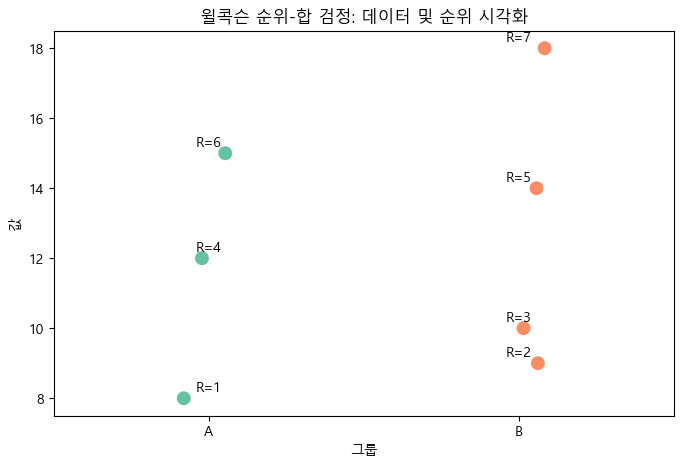

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 깨짐
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

# 데이터 준비
group_A = np.array([8, 12, 15])
group_B = np.array([9, 10, 14, 18])

# 데이터프레임 생성
df = pd.DataFrame({
    "값": np.concatenate([group_A, group_B]),
    "그룹": ["A"] * len(group_A) + ["B"] * len(group_B)
})

# 순위 계산
df["순위"] = df["값"].rank(method="average")

# 그룹별 순위합 계산
R1 = df[df["그룹"]=="A"]["순위"].sum()
R2 = df[df["그룹"]=="B"]["순위"].sum()
n1, n2 = len(group_A), len(group_B)

# U 통계량 계산
U1 = n1*n2 + (n1*(n1+1))/2 - R1
U2 = n1*n2 - U1
U = min(U1, U2)

# p-value 계산
stat, p_value = mannwhitneyu(group_A, group_B, alternative="two-sided")

print("=== 순위 테이블 ===")
print(df.sort_values("순위"))
print(f"\n그룹 A 순위합 R1 = {R1}")
print(f"그룹 B 순위합 R2 = {R2}")
print(f"U 통계량 = {U}")
print(f"p-value = {p_value}")

# 순위 시각화
plt.figure(figsize=(8,5))
sns.stripplot(x="그룹", y="값", data=df, jitter=True, size=10, palette="Set2")
for i in range(len(df)):
    plt.text(df["그룹"].iloc[i], df["값"].iloc[i]+0.2, f"R={int(df['순위'].iloc[i])}", 
             ha="center", fontsize=10)
plt.title("윌콕슨 순위-합 검정: 데이터 및 순위 시각화")
plt.ylabel("값")
plt.xlabel("그룹")
plt.show()
